In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
epochs = 16
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [3]:
PATH = './data'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_yes_dir = os.path.join(train_dir, 'yes')  # directory with our training cat pictures
train_no_dir = os.path.join(train_dir, 'no')  # directory with our training dog pictures
validation_yes_dir = os.path.join(validation_dir, 'yes')  # directory with our validation cat pictures
validation_no_dir = os.path.join(validation_dir, 'no')  # directory with our validation dog pictures
print(train_dir)
print(validation_dir)

print(train_yes_dir)
print(train_no_dir)
print(validation_yes_dir)
print(validation_no_dir)

./data\train
./data\validation
./data\train\yes
./data\train\no
./data\validation\yes
./data\validation\no


In [4]:
num_yes_tr = len(os.listdir(train_yes_dir))
num_no_tr = len(os.listdir(train_no_dir))

num_yes_val = len(os.listdir(validation_yes_dir))
num_no_val = len(os.listdir(validation_no_dir))

total_train = num_yes_tr + num_no_tr
total_val = num_yes_val + num_no_val

print('total training yes images:', num_yes_tr)
print('total training no images:', num_no_tr)

print('total validation yes images:', num_yes_val)
print('total validation no images:', num_no_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training yes images: 135
total training no images: 82
total validation yes images: 20
total validation no images: 16
--
Total training images: 217
Total validation images: 36


In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range=45,
                                            width_shift_range=.05,
                                            height_shift_range=.05,
                                            horizontal_flip=True,
                                            vertical_flip=True,
                                            zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255, 
                                               rotation_range=45,
                                                width_shift_range=.05,
                                                height_shift_range=.05,
                                                horizontal_flip=True,
                                                vertical_flip=True,
                                                zoom_range=0.5)

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 217 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [7]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

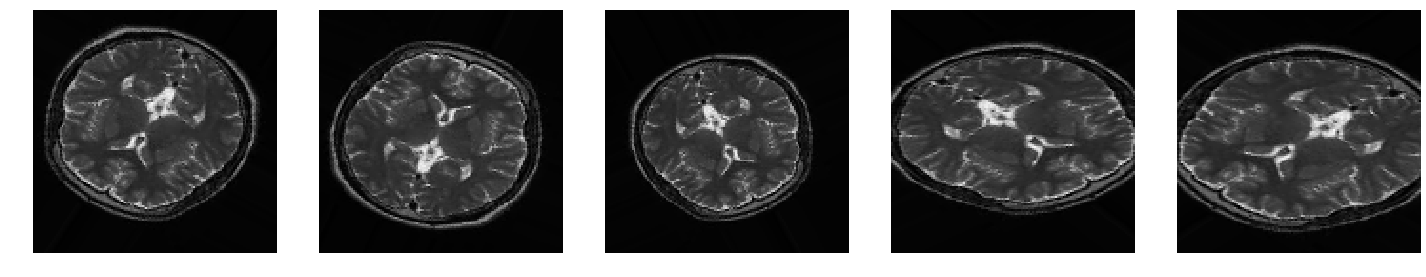

In [8]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [11]:
model = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3), activity_regularizer=l2(0.001)),
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3), activity_regularizer=l2(0.001)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu', activity_regularizer=l2(0.001)),
    Conv2D(128, 3, padding='same', activation='relu', activity_regularizer=l2(0.001)),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(512, 3, padding='same', activation='relu', activity_regularizer=l2(0.001)),
    Conv2D(512, 3, padding='same', activation='relu', activity_regularizer=l2(0.001)),
    MaxPooling2D(),
    Dropout(0.4),
    Conv2D(1024, 3, padding='same', activation='relu', activity_regularizer=l2(0.001)),
    Conv2D(1024, 3, padding='same', activation='relu', activity_regularizer=l2(0.001)),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 128)       0         
__________

Instructions for updating:
Use tf.cast instead.
Epoch 1/16
7/7 [==============================] - 98s 14s/step - loss: 4.3477 - acc: 0.5161 - val_loss: 1.6623 - val_acc: 0.5556
Epoch 2/16
7/7 [==============================] - 97s 14s/step - loss: 1.5293 - acc: 0.6129 - val_loss: 0.9718 - val_acc: 0.5556
Epoch 3/16
7/7 [==============================] - 99s 14s/step - loss: 0.9548 - acc: 0.6037 - val_loss: 0.7500 - val_acc: 0.5556
Epoch 4/16
7/7 [==============================] - 99s 14s/step - loss: 0.7575 - acc: 0.6037 - val_loss: 0.7323 - val_acc: 0.5556
Epoch 5/16
7/7 [==============================] - 99s 14s/step - loss: 0.7096 - acc: 0.6083 - val_loss: 0.7042 - val_acc: 0.5556
Epoch 6/16
7/7 [==============================] - 99s 14s/step - loss: 0.6860 - acc: 0.6221 - val_loss: 0.7049 - val_acc: 0.5556
Epoch 7/16
7/7 [==============================] - 100s 14s/step - loss: 0.6904 - acc: 0.6175 - val_loss: 0.6650 - val_acc: 0.5556
Epoch 8/16
7/7 [==============================] 

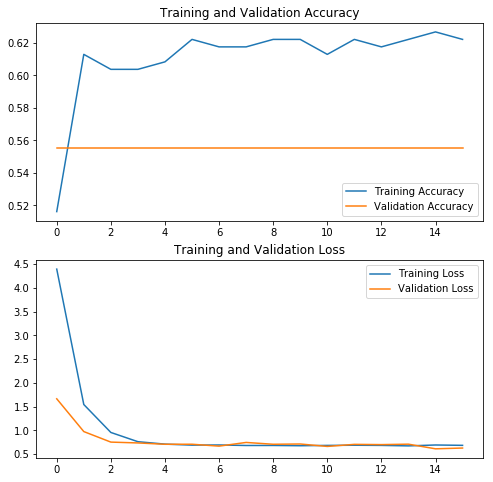

Wall time: 26min 19s


In [13]:
%%time
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    verbose = 1)

# print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs) 

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()